Code for scraping Harham.com

In [2]:
import requests, bs4, time
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import date
import os
import re
import matplotlib.pyplot as plt


In [3]:
def extract_links(soup):
    links =[]
    for div in soup.find_all(name='a', attrs={'class':'job-block__title-link'}):
        links.append(div['href'])
    return links

def extract_salary(page_soup):
    for div in page_soup.find_all("div",{"class","cop-widget dynamic-widget salary-widget"}):
         a=[x.text for x in div.find_all("span")]
    return a[0].lstrip('Salary:\n').rstrip(' \n')


def extract_location(page_soup):
    a=[]
    for div in page_soup.find_all("div",{"class","cop-widget dynamic-widget text-widget"}):
         a.append([x.text for x in div.find_all("div",{"class",""})])
    return a[0]

def extract_jobref(page_soup):
    a=[]
    for div in page_soup.find_all("div",{"class","cop-widget dynamic-widget text-widget"}):
         a.append([x.text for x in div.find_all("div",{"class",""})])
    return a[1]

def extract_type(page_soup):
    a=[x.text for x in page_soup.find_all("li",{"class","JobType-wrapper"})]
    type=a[0].lstrip('Job type\n                    \n').rstrip(' \n')
    return type

def extract_description(page_soup):
    b=page_soup.find_all("div",{"class":"cop-widget dynamic-widget description-widget"})
    for div  in b:
        c=str([x.text for x in div.find_all("p")]) +" "+ str([x.text for x in div.find_all("li")])
        desc=''.join(c)
    return desc

def extract_job_title(page_soup):
    return [x.text for x in page_soup.find_all("strong")][0]
    

In [4]:
#urls for UK data science jobs
links=[]
for i in range(1,4):
    url="https://www.harnham.com/jobs?options=1111,652&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=extract_links(page_soup)
    for element in a:
        links.append(element)

#urls for UK marketing/insight jobs
for i in range(1,8):
    url="https://www.harnham.com/jobs?options=973,652&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=extract_links(page_soup)
    for element in a:
        links.append(element)
            
#urls digital analytics
for i in range(1,5):
    url="https://www.harnham.com/jobs?options=1035,652&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=extract_links(page_soup)
    for element in a:
        links.append(element)

#urls for data and technology jobs
for i in range(1,7):
    url="https://www.harnham.com/jobs?options=972,652&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=extract_links(page_soup)
    for element in a:
        links.append(element)
    


len(links)

1166

In [5]:
    
info=pd.DataFrame(columns=("job_ref","job_title","location","salary","description","type"))
for urls in links:
    time.sleep(1) #ensuring at least 1 second between page grabs
    url="https://www.harnham.com"+urls
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    df=pd.DataFrame()
    df['job_ref']=[extract_jobref(page_soup)]
    df['job_title']=[extract_job_title(page_soup)]
    df['location']=[extract_location(page_soup)]
    df['salary']=[extract_salary(page_soup)]
    df['description']=[extract_description(page_soup)]
    df['type']=[extract_type(page_soup)]
    info=info.append(df,ignore_index=True)


In [6]:
info["extraction_date"]= date.today()


In [7]:
info.head()

,job_ref,job_title,location,salary,description,type,extraction_date
0,[7245/KD],Pricing Data Scientist,[London],£40000 - £50000 per annum + benefits + bonus,"['Pricing Data Scientist ', 'London ', '£40,00...",Permanent,2019-10-24
1,[VACNM23wks1-],Lead Data Scientist,[London],£100000 - £110000 per annum + Benefits,"['Lead Data ScientistRetailLondon£95,000 + ben...",Permanent,2019-10-24
2,[VASNF348rjhf0-23484],Lead Machine Learning Engineer,[London],£85000 - £100000 per annum + Benefits,['Lead Machine Learning EngineerDeep Learning ...,Permanent,2019-10-24
3,"[VACNW""M1-we]",NLP Scientist,[London],£90000 - £100000 per annum + Benefits,"['NLP ScientistLondon£90,000 - £100,000', 'OVE...",Permanent,2019-10-24
4,[67222/KD],Senior Data Scientist,[London],£70000 - £80000 per annum + benefits + bonus,"['Senior Data Scientist ', 'London', '£70,000-...",Permanent,2019-10-24


In [14]:
#print data to csv
date=date.today()
#info.to_csv(r"harnham_scrape_data_{}.csv".format(date))


Now to clean the data...
First define cleaning functions

In [8]:
def clean_location(df):
    import re
    for i in range(len(df['location'])):
        rep = {"[": "",
               "]": "",
               "''": "",
               "'": ""}
        df['location'][i]=str(df['location'][i])
        rep = dict((re.escape(k), v) for k, v in rep.items()) 
        pattern = re.compile("|".join(rep.keys()))
        df['location'][i]=(pattern.sub(lambda m: rep[re.escape(m.group(0))], df['location'][i]))

    


In [9]:

def remove_duped_info_from_description(df):
        df['description']=[x.replace(y,"") for x,y in zip(df['description'],df['location'])]
        df['description']=[x.replace(y,"") for x,y in zip(df['description'],df['job_title'])]
        df['description']=[x.replace(y,"") for x,y in zip(df['description'],df['salary'])]

def clean_description(df):
    import re
    series=[]
    for i in range(len(df['description'])):
        rep = {"[": "",
               "]": "",
               "|": "",
               "''": "",
               "'": "",
               ",": "",
               "+": "",
               "/": "",
               "benefits":"",
               "THE COMPANY": "",
               "THE ROLE": "",
               "THE BENEFITS": "",
               "HOW TO APPLY": "",
               "KEYWORDS": "",
               "YOUR SKILLS AND EXPERIENCE": "",
               "YOUR SKILLS AND EXPERTISE": "",
               "Please register your interest by sending your CV via the Apply link on this page":"",
               "BENEFITS":"",
               "CONTACT":"",
               "OVERVIEW":"",
               "SALARY":"",
               "For further details":"",
               "to enquire about other roles please contact":"",
               "Nick Mandella":"",
               "Harnham":"",
               "On a daily basis":"",
               "you will be:":"",
               "you will join:":"",
               "!":"",
               ".": ""}
        rep = dict((re.escape(k), v) for k, v in rep.items()) 
        pattern = re.compile("|".join(rep.keys()))
        df['description'][i]=(pattern.sub(lambda m: rep[re.escape(m.group(0))],df['description'][i]))
        



In [10]:
def create_split_salary_range(df):
    
    df['salary_low']=df['salary'].str.split(" - ", n = 1, expand = True)[0]
    df['salary_high']=df['salary'].str.split(" - ", n = 1, expand = True)[1]

    for x in range(len(df["salary_high"])):
        if pd.isnull(df.loc[x,"salary_high"]):
            df.loc[x,"salary_high"]=df.loc[x,"salary_low"]

def clean_salary(df):
    df['salary_low']=[x.split("£",1)[1] for x in df['salary_low']]
    df['salary_low']=[x.split("per",1)[0] for x in df['salary_low']]
    df['salary_high']=[x.split('£', 1)[1]for x in df['salary_high']]
    df['salary_high']=[x.split('per', 1)[0]for x in df['salary_high']]
    df['salary_high']=pd.to_numeric(df['salary_high'])
    df['salary_low']=pd.to_numeric(df['salary_low'])

In [11]:
#run cleaning functions
clean_location(info)
remove_duped_info_from_description(info)
clean_description(info)
create_split_salary_range(info)
clean_salary(info)

In [12]:
info.head()

,job_ref,job_title,location,salary,description,type,extraction_date,salary_low,salary_high
0,[7245/KD],Pricing Data Scientist,London,£40000 - £50000 per annum + benefits + bonus,£40000-£50000 Applying exploratory advance...,Permanent,2019-10-24,40000,50000
1,[VACNM23wks1-],Lead Data Scientist,London,£100000 - £110000 per annum + Benefits,Retail£95000 are working with one of the l...,Permanent,2019-10-24,100000,110000
2,[VASNF348rjhf0-23484],Lead Machine Learning Engineer,London,£85000 - £100000 per annum + Benefits,Deep Learning NLP£85000 - £100000 are curre...,Permanent,2019-10-24,85000,100000
3,"[VACNW""M1-we]",NLP Scientist,London,£90000 - £100000 per annum + Benefits,£90000 - £100000 are currently working exclu...,Permanent,2019-10-24,90000,100000
4,[67222/KD],Senior Data Scientist,London,£70000 - £80000 per annum + benefits + bonus,£70000-£80000 bonus Do you want to be a b...,Permanent,2019-10-24,70000,80000


In [13]:
# check for salary anomalies
info[info['salary_high']/info['salary_low']>3]
#correct the mistake
info.loc[info['salary_high']==max(info['salary_high']),'salary_high']=65000

NameError: name 'data' is not defined

Plot data

(array([11.,  0.,  0.,  7., 36., 40., 35., 20.,  9., 13.]),
 array([   550.,  13495.,  26440.,  39385.,  52330.,  65275.,  78220.,
         91165., 104110., 117055., 130000.]),
 <a list of 10 Patch objects>)

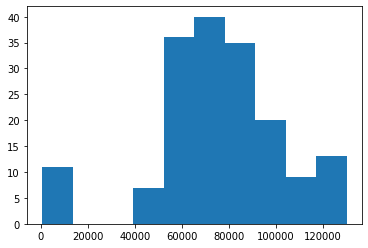

In [166]:
plt.hist(data['salary_high'])

In [163]:
word =[x.count("data engineer") for x in data['description']]

In [ ]:
## for testing formulae
#url="https://www.harnham.com/job/data-scientist-in-london-jid-2435"
#req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
#webpage=urlopen(req).read()
#page_soup = soup(webpage, "html.parser")
#a=extract_description(page_soup)